In [71]:
from google.colab import drive
drive.mount('/content/drive/')

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [72]:
def loadFile(locationNumber):
  with open('/content/drive/MyDrive/transmitterrotationprofile/tuesdayloc' + str(locationNumber) + '.log', 'r') as f:
    filedata = f.read()
    return filedata

angles = np.arange(0.0,356.0) # Holds all the angles that the system can represent
for x in range(len(angles)):
  angles[x] = (angles[x] / 355) * 359

def processData(file):
    splitFile = file[54:].split('\n\n')
    splitFile = splitFile[1:len(splitFile)-1]
    data = []
    for i in range(len(splitFile)):
      if(len(splitFile[i]) == 29):
        dataPoint = []
        dataPoint.append(-int(splitFile[i][7:9])) # RSSI
        dataPoint.append(splitFile[i][27:28]) # ID
        dataPoint.append(((int(splitFile[i][23:25] + splitFile[i][26:27], 16)) / 355) * 359) # Angle (need to normalise between 0 and 359 degrees)
        dataPoint.append(int(splitFile[i][14:16] + splitFile[i][17:19] + splitFile[i][20:22], 16)) # Relative time (not used in this notebook)
        data.append(dataPoint)
    return data

def avgDataFromID(data, id):
  dataFromAntenna = []
  for i in range(len(data)):
    if data[i][1] == id:
      dataFromAntenna.append(data[i])

  averagedData = []
  for i in angles:
    currentAverage = []
    for j in range(len(dataFromAntenna)):
      if dataFromAntenna[j][2] == i:
        currentAverage.append(dataFromAntenna[j][0])
    averagedData.append(np.mean(currentAverage))

  return averagedData

def plotData(fileNumber):
  plt.xlabel("Angle")
  plt.ylabel("RSSI")
  plt.plot(angles, avgDataFromID(processData(loadFile(fileNumber)),'a'), color="red")
  plt.plot(angles, avgDataFromID(processData(loadFile(fileNumber)),'b'), color="green")
  plt.plot(angles, avgDataFromID(processData(loadFile(fileNumber)),'c'), color="blue")

def plotAntennae(fileNumber):
  plt.xlabel("Angle")
  plt.ylabel("RSSI")
  fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
  plt.plot(np.deg2rad(angles), avgDataFromID(processData(loadFile(fileNumber)),'a'), color="red")
  plt.plot(np.deg2rad(angles), avgDataFromID(processData(loadFile(fileNumber)),'b'), color="green")
  plt.plot(np.deg2rad(angles), avgDataFromID(processData(loadFile(fileNumber)),'c'), color="blue")

# Location 1
Measured for 15 minutes, transmitter between three trees

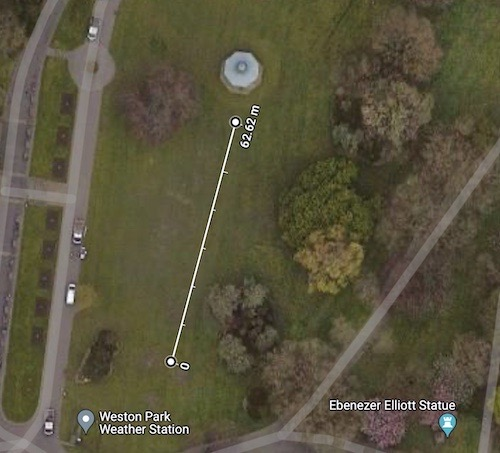


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


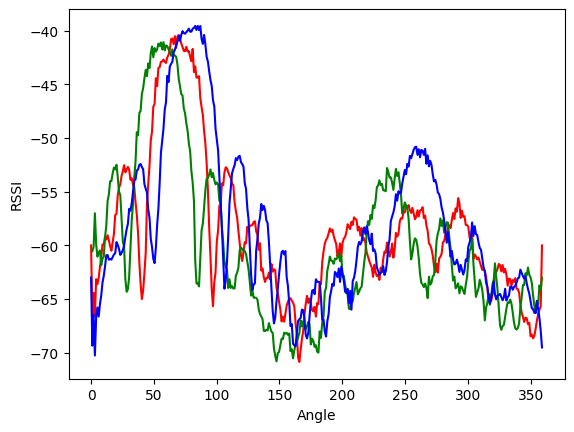

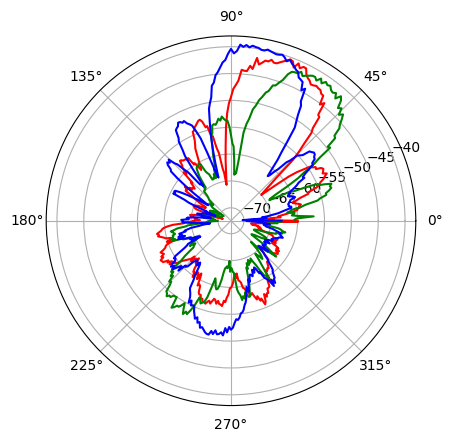

In [73]:
plotData(1)
plotAntennae(1)

# Location 2
Measured for 10 minutes, receiever partially obscured by tree & hill, positioned on bench.

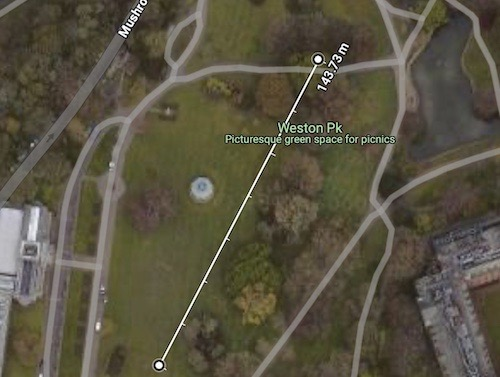

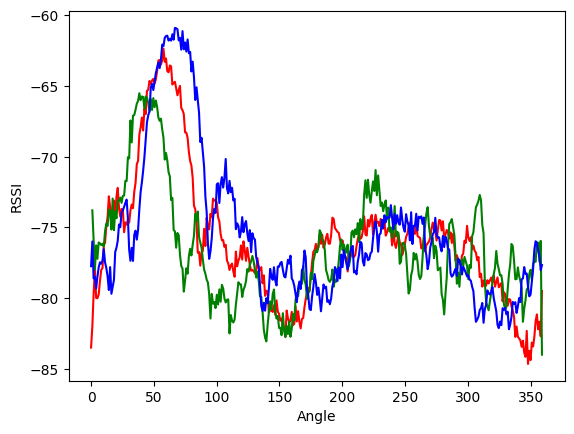

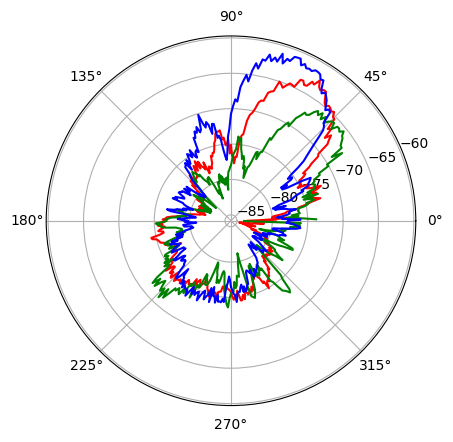

In [74]:
plotData(2)
plotAntennae(2)

# Location 3
Very close, receiver once again on bench.

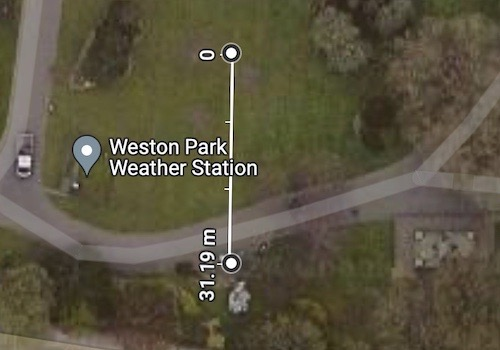

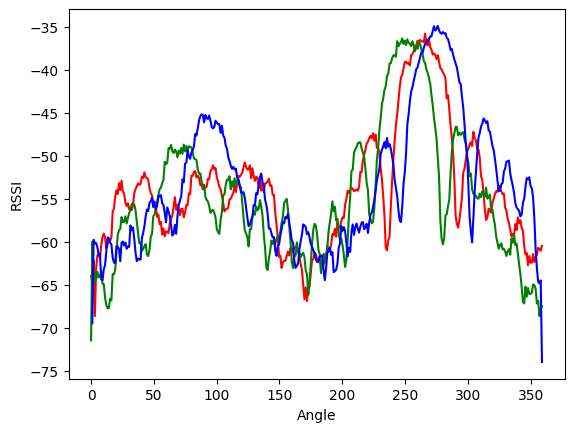

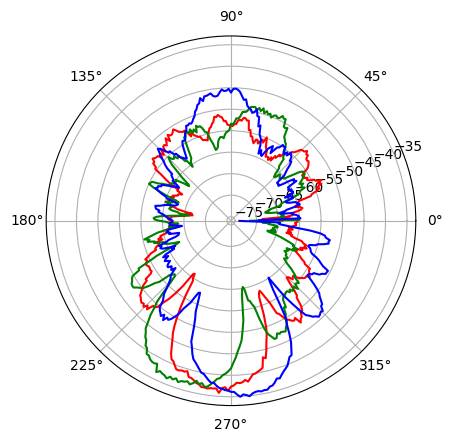

In [75]:
plotData(3)
plotAntennae(3)

# Location 4
Incline from transmitter, clear path otherwise.

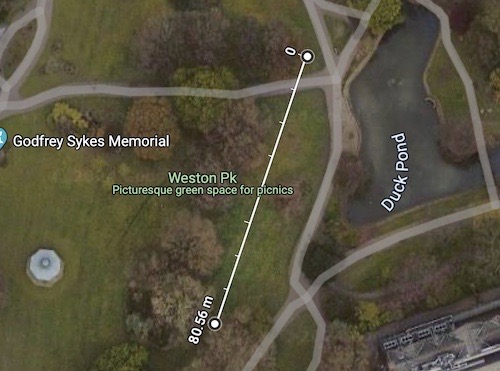

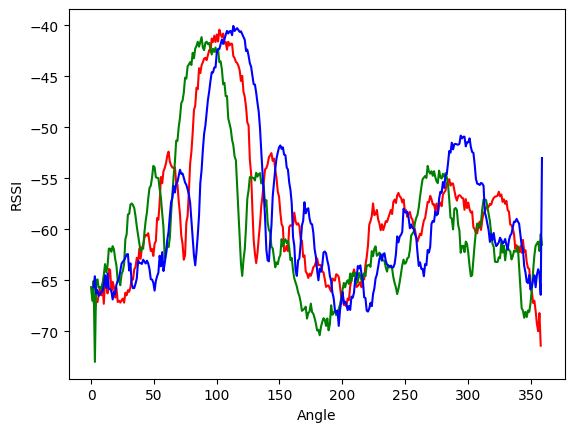

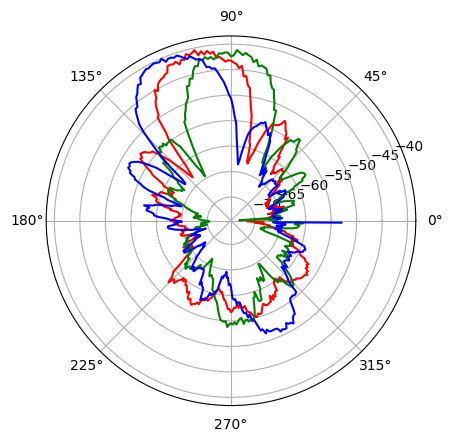

In [76]:
plotData(4)
plotAntennae(4)

# Location 5
Heavily obscured by trees and passers-by.

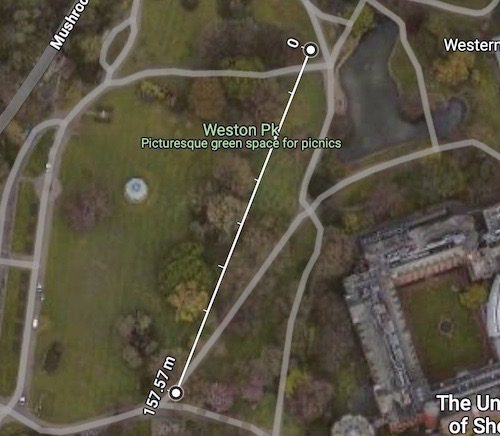

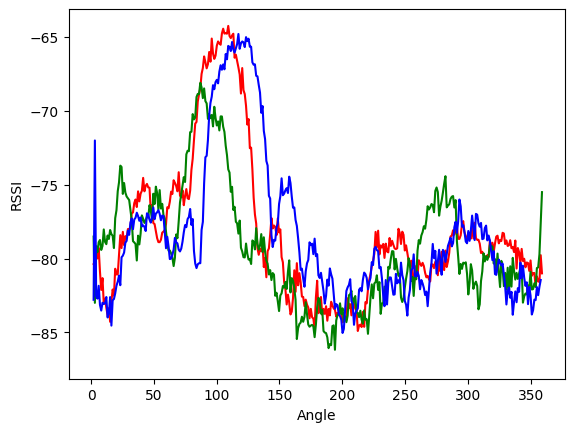

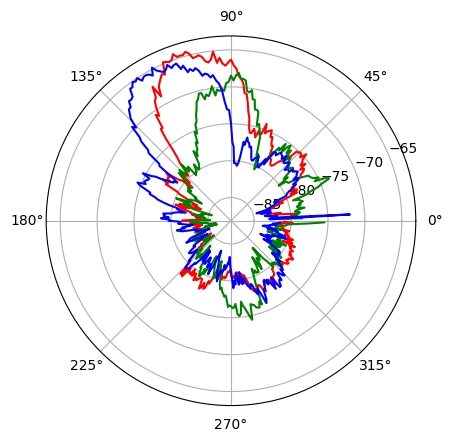

In [77]:
plotData(5)
plotAntennae(5)

# Location 6
100m long test, most accurate profile (?). Clear path, slight decline from transimtter, potentially distruption from passers-by.

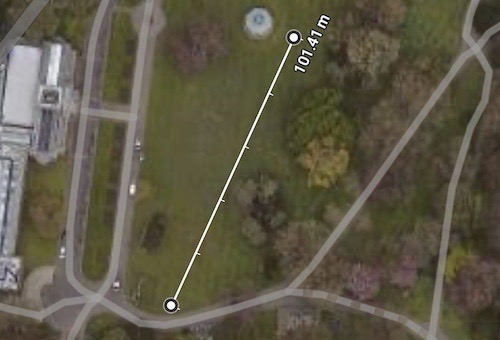

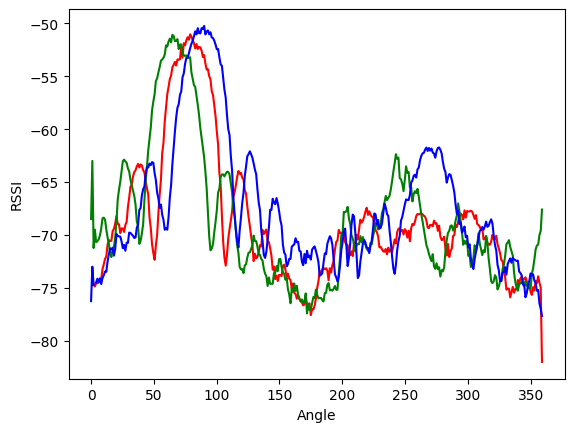

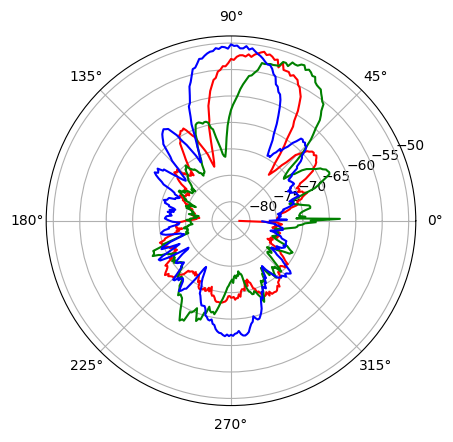

In [78]:
plotData(6)
plotAntennae(6)